# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 외국어학원

In [11]:
# 외국어학원만 남기기
ap_eng = df_ap_quarter[df_ap_quarter.업종명 == '외국어학원'].reset_index().drop('index', axis=1)
ap_eng

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,외국어학원,압구정동,2677392369,42,2,2
1,2017-2,서비스,교육,외국어학원,압구정동,2842181181,41,2,3
2,2017-3,서비스,교육,외국어학원,압구정동,3032714767,40,0,1
3,2017-4,서비스,교육,외국어학원,압구정동,2537954514,39,2,3
4,2018-1,서비스,교육,외국어학원,압구정동,2888338572,38,1,2
5,2018-2,서비스,교육,외국어학원,압구정동,3048932396,39,2,1
6,2018-3,서비스,교육,외국어학원,압구정동,2830270996,40,2,1
7,2018-4,서비스,교육,외국어학원,압구정동,2383294839,43,5,2
8,2019-1,서비스,교육,외국어학원,압구정동,2107303236,43,3,1
9,2019-2,서비스,교육,외국어학원,압구정동,2611857374,48,5,2


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [12]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_eng['성장성'] = ap_eng['분기당_매출_금액'] / ap_eng['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_eng['성장성'][0] = 1

ap_eng

<ipython-input-12-e89a4ed391fe>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_eng['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,교육,외국어학원,압구정동,2677392369,42,2,2,1.000000
1,2017-2,서비스,교육,외국어학원,압구정동,2842181181,41,2,3,1.061548
2,2017-3,서비스,교육,외국어학원,압구정동,3032714767,40,0,1,1.067038
3,2017-4,서비스,교육,외국어학원,압구정동,2537954514,39,2,3,0.836859
4,2018-1,서비스,교육,외국어학원,압구정동,2888338572,38,1,2,1.138058
5,2018-2,서비스,교육,외국어학원,압구정동,3048932396,39,2,1,1.055601
6,2018-3,서비스,교육,외국어학원,압구정동,2830270996,40,2,1,0.928283
7,2018-4,서비스,교육,외국어학원,압구정동,2383294839,43,5,2,0.842073
8,2019-1,서비스,교육,외국어학원,압구정동,2107303236,43,3,1,0.884197
9,2019-2,서비스,교육,외국어학원,압구정동,2611857374,48,5,2,1.239431


In [13]:
# 개업률, 폐업률, 순점포증감률 추가

ap_eng['개업률'] = (ap_eng['개업점포수'] / ap_eng['총 점포수']) * 100
ap_eng['폐업률'] = (ap_eng['폐업점포수'] / ap_eng['총 점포수']) * 100
ap_eng['순점포증감률'] = ((ap_eng['개업점포수'] - ap_eng['폐업점포수']) / ap_eng['총 점포수']) * 100

ap_eng

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,서비스,교육,외국어학원,압구정동,2677392369,42,2,2,1.000000,4.761905,4.761905,0.000000
1,2017-2,서비스,교육,외국어학원,압구정동,2842181181,41,2,3,1.061548,4.878049,7.317073,-2.439024
2,2017-3,서비스,교육,외국어학원,압구정동,3032714767,40,0,1,1.067038,0.000000,2.500000,-2.500000
3,2017-4,서비스,교육,외국어학원,압구정동,2537954514,39,2,3,0.836859,5.128205,7.692308,-2.564103
4,2018-1,서비스,교육,외국어학원,압구정동,2888338572,38,1,2,1.138058,2.631579,5.263158,-2.631579
5,2018-2,서비스,교육,외국어학원,압구정동,3048932396,39,2,1,1.055601,5.128205,2.564103,2.564103
6,2018-3,서비스,교육,외국어학원,압구정동,2830270996,40,2,1,0.928283,5.000000,2.500000,2.500000
7,2018-4,서비스,교육,외국어학원,압구정동,2383294839,43,5,2,0.842073,11.627907,4.651163,6.976744
8,2019-1,서비스,교육,외국어학원,압구정동,2107303236,43,3,1,0.884197,6.976744,2.325581,4.651163
9,2019-2,서비스,교육,외국어학원,압구정동,2611857374,48,5,2,1.239431,10.416667,4.166667,6.250000


In [14]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 외국어학원만 남기기
gangnam_eng = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '외국어학원'].reset_index()

################################################################################################################################################################################################

ap_eng['시장성'] = (ap_eng['분기당_매출_금액'] / ap_eng['총 점포수']) - (gangnam_eng['분기당_매출_금액'] / gangnam_eng['총 점포수'])

ap_eng = ap_eng[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_eng

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,외국어학원,2677392369,1.000000,0.000000,-3.347717e+07
1,2017-2,외국어학원,2842181181,1.061548,-2.439024,-2.640564e+07
2,2017-3,외국어학원,3032714767,1.067038,-2.500000,-2.929454e+07
3,2017-4,외국어학원,2537954514,0.836859,-2.564103,-2.651756e+07
4,2018-1,외국어학원,2888338572,1.138058,-2.631579,-1.442998e+07
5,2018-2,외국어학원,3048932396,1.055601,2.564103,-3.267217e+06
6,2018-3,외국어학원,2830270996,0.928283,2.500000,-1.329541e+07
7,2018-4,외국어학원,2383294839,0.842073,6.976744,-1.066739e+07
8,2019-1,외국어학원,2107303236,0.884197,4.651163,-3.076674e+07
9,2019-2,외국어학원,2611857374,1.239431,6.250000,-1.151425e+07


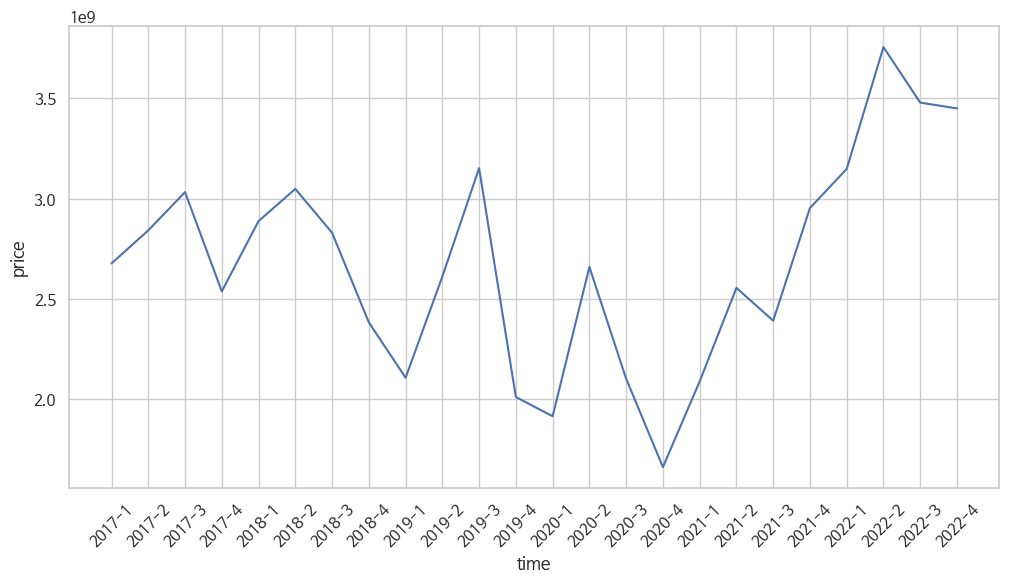

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_eng['분기'], y=ap_eng['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_eng[['성장성', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -3.347717e+07   0.000000
1   1.061548 -2.640564e+07  -2.439024
2   1.067038 -2.929454e+07  -2.500000
3   0.836859 -2.651756e+07  -2.564103
4   1.138058 -1.442998e+07  -2.631579
5   1.055601 -3.267217e+06   2.564103
6   0.928283 -1.329541e+07   2.500000
7   0.842073 -1.066739e+07   6.976744
8   0.884197 -3.076674e+07   4.651163
9   1.239431 -1.151425e+07   6.250000
10  1.206855 -1.312847e+07   0.000000
11  0.638009 -9.909515e+06  -2.222222
12  0.952482 -3.120822e+06   5.263158
13  1.388478  9.156522e+06   0.000000
14  0.790478 -6.609104e+06   2.564103
15  0.790414 -1.217486e+07   7.142857
16  1.256944 -5.310883e+06   0.000000
17  1.223329  1.471956e+06   2.380952
18  0.936079 -5.655098e+06   0.000000
19  1.234754  1.032821e+07   4.545455
20  1.066087  8.891275e+06  12.000000
21  1.192891  1.348941e+07   7.547170
22  0.926321  9.189092e+06  -3.921569
23  0.991681  1.156154e+07   1.923077
--------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.38417535 0.90843869 0.        ]
 [0.47126849 0.95895215 0.36708981]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.14575, saving model to stock_model.h5
1/1 [==============================] - 8s 8s/step - loss: 0.2772 - val_loss: 0.1458
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2762
Epoch 2: val_loss improved from 0.14575 to 0.14498, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2762 - val_loss: 0.1450
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2752
Epoch 3: val_loss improved from 0.14498 to 0.14421, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2752 - val_loss: 0.1442
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2742
Epoch 4: val_loss improved from 0.14421 to 0.14345, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2742 - val_loss: 0.1435
Epoch 5/300
1/1 [=================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 715ms/step
[[0.28945506]
 [0.3778115 ]
 [0.38623956]
 [0.3306986 ]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.709986,0.289455
2022-2,1.000000,0.377811
2022-3,0.867854,0.386240
2022-4,0.854034,0.330699


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_eng의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.709986,0.289455,3148592176,2.267937e+09,8.806557e+08
2022-2,1.000000,0.377811,3755926599,2.452968e+09,1.302958e+09
2022-3,0.867854,0.386240,3479192986,2.470618e+09,1.008575e+09
2022-4,0.854034,0.330699,3450251121,2.354307e+09,1.095944e+09


In [27]:
df_test = df_test.reset_index()

### 결과

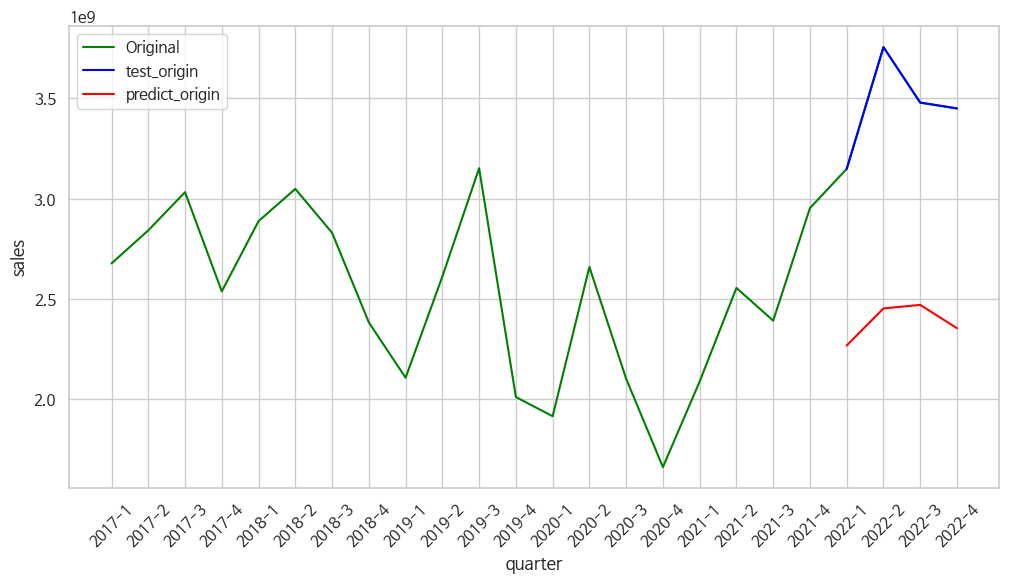

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.072033e+09
std      1.775298e+08
min      8.806557e+08
25%      9.765953e+08
50%      1.052260e+09
75%      1.147698e+09
max      1.302958e+09
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.24831088]]
--------------------------------------------------------------------------------
예측된 매출  : 2181774336.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0   2677392369 -3.347717e+07   0.000000
1   2842181181 -2.640564e+07  -2.439024
2   3032714767 -2.929454e+07  -2.500000
3   2537954514 -2.651756e+07  -2.564103
4   2888338572 -1.442998e+07  -2.631579
5   3048932396 -3.267217e+06   2.564103
6   2830270996 -1.329541e+07   2.500000
7   2383294839 -1.066739e+07   6.976744
8   2107303236 -3.076674e+07   4.651163
9   2611857374 -1.151425e+07   6.250000
10  3152134184 -1.312847e+07   0.000000
11  2011091445 -9.909515e+06  -2.222222
12  1915527695 -3.120822e+06   5.263158
13  2659667264  9.156522e+06   0.000000
14  2102409047 -6.609104e+06   2.564103
15  1661773093 -1.217486e+07   7.142857
16  2088755375 -5.310883e+06   0.000000
17  2555235402  1.471956e+06   2.380952
18  2391901999 -5.655098e+06   0.000000
19  2953410911  1.032821e+07   4.545455
20  3148592176  8.891275e+06  12.000000
21  3755926599  1.348941e+07   7.547170
22  3479192986  9.189092e+06  -3.921569
23  3450251121  1.156154e+07   1.923077


In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.86785419 0.90843869 0.        ]
 [0.85403387 0.95895215 0.36708981]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2863
Epoch 1: val_loss improved from inf to 0.45055, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2863 - val_loss: 0.4505
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2853
Epoch 2: val_loss improved from 0.45055 to 0.44929, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2853 - val_loss: 0.4493
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2844
Epoch 3: val_loss improved from 0.44929 to 0.44803, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2844 - val_loss: 0.4480
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2834
Epoch 4: val_loss improved from 0.44803 to 0.44678, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2834 - val_loss: 0.4468
Epoch 5/300
1/1 [=================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 687ms/step
[[0.42492637]
 [0.5846165 ]
 [0.6905712 ]
 [0.6261087 ]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.570414,0.424926
2022-2,0.739380,0.584616
2022-3,0.384175,0.690571
2022-4,0.471268,0.626109


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 3].values       # 성장성이 ap_eng의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.570414,0.424926,1.066087,0.956903,0.109184
2022-2,0.739380,0.584616,1.192891,1.076746,0.116145
2022-3,0.384175,0.690571,0.926321,1.156261,-0.229940
2022-4,0.471268,0.626109,0.991681,1.107884,-0.116203


### 결과

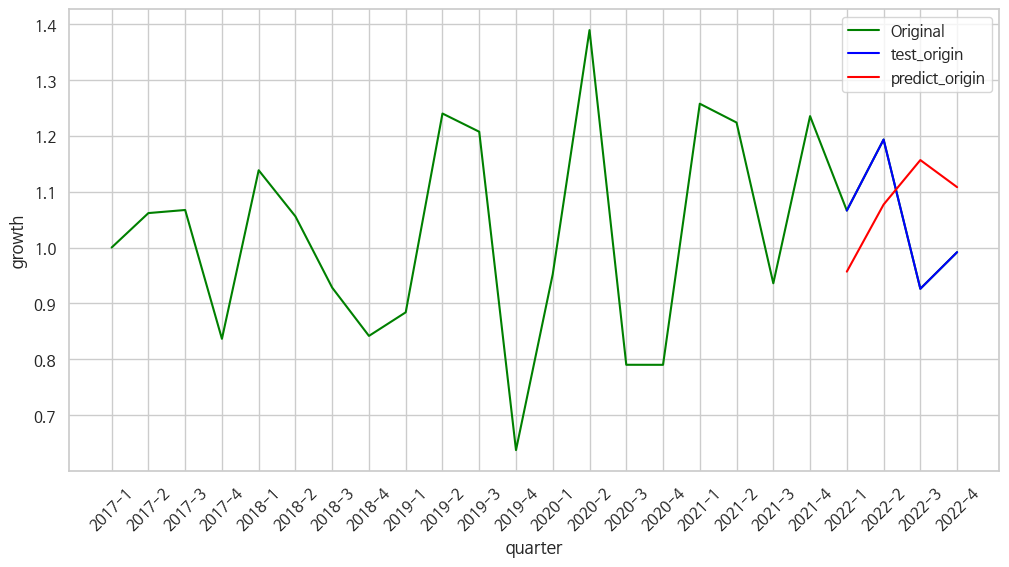

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.030204
std      0.171403
min     -0.229940
25%     -0.144637
50%     -0.003510
75%      0.110924
max      0.116145
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 21ms/step
[[0.5036671]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0159956216812134 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_eng[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_eng.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액     순점포증감률
0   1.000000  2677392369   0.000000
1   1.061548  2842181181  -2.439024
2   1.067038  3032714767  -2.500000
3   0.836859  2537954514  -2.564103
4   1.138058  2888338572  -2.631579
5   1.055601  3048932396   2.564103
6   0.928283  2830270996   2.500000
7   0.842073  2383294839   6.976744
8   0.884197  2107303236   4.651163
9   1.239431  2611857374   6.250000
10  1.206855  3152134184   0.000000
11  0.638009  2011091445  -2.222222
12  0.952482  1915527695   5.263158
13  1.388478  2659667264   0.000000
14  0.790478  2102409047   2.564103
15  0.790414  1661773093   7.142857
16  1.256944  2088755375   0.000000
17  1.223329  2555235402   2.380952
18  0.936079  2391901999   0.000000
19  1.234754  2953410911   4.545455
20  1.066087  3148592176  12.000000
21  1.192891  3755926599   7.547170
22  0.926321  3479192986  -3.921569
23  0.991681  3450251121   1.923077
--------------------------------------------------------------------------------
             시장성
0 

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.38417535 0.86785419 0.        ]
 [0.47126849 0.85403387 0.36708981]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1897
Epoch 1: val_loss improved from inf to 0.51213, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1897 - val_loss: 0.5121
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1888
Epoch 2: val_loss improved from 0.51213 to 0.51069, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1888 - val_loss: 0.5107
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1879
Epoch 3: val_loss improved from 0.51069 to 0.50925, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1879 - val_loss: 0.5092
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1870
Epoch 4: val_loss improved from 0.50925 to 0.50781, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1870 - val_loss: 0.5078
Epoch 5/300
1/1 [=================

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 959ms/step
[[0.3592282 ]
 [0.49026027]
 [0.534823  ]
 [0.46971795]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.902098,0.359228
2022-2,1.000000,0.490260
2022-3,0.908439,0.534823
2022-4,0.958952,0.469718


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 5].values       # 시장성이 ap_eng의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.902098,0.359228,8.891275e+06,-16605451.0,2.549673e+07
2022-2,1.000000,0.490260,1.348941e+07,-10451322.0,2.394074e+07
2022-3,0.908439,0.534823,9.189092e+06,-8358362.5,1.754745e+07
2022-4,0.958952,0.469718,1.156154e+07,-11416125.0,2.297766e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


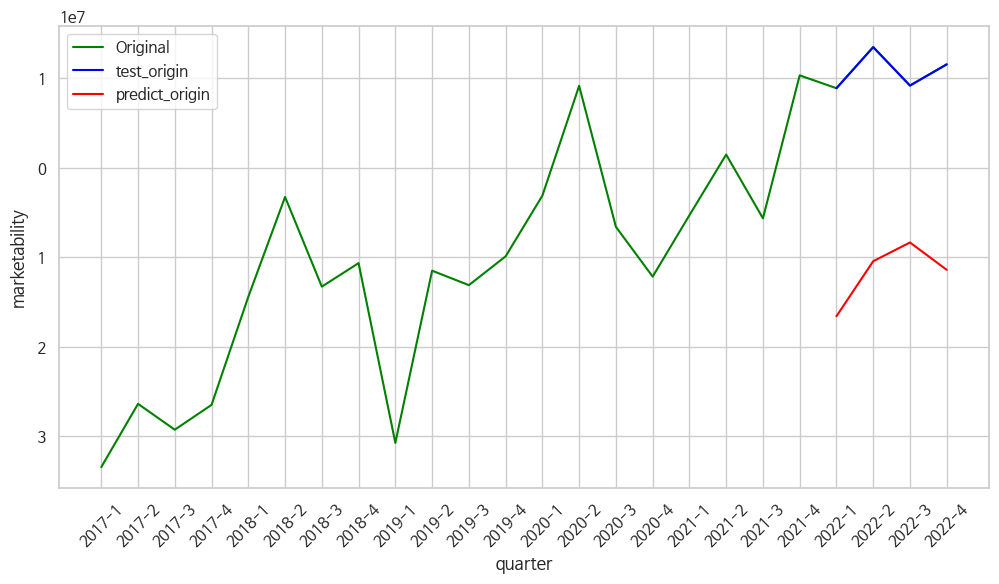

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.249064e+07
std      3.455026e+06
min      1.754745e+07
25%      2.162011e+07
50%      2.345920e+07
75%      2.432973e+07
max      2.549673e+07
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.35021535]]
--------------------------------------------------------------------------------
예측된 시장성  : -17028754.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_eng[['성장성', '분기당_매출_금액', '시장성']]
y = ap_eng.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  2677392369 -3.347717e+07
1   1.061548  2842181181 -2.640564e+07
2   1.067038  3032714767 -2.929454e+07
3   0.836859  2537954514 -2.651756e+07
4   1.138058  2888338572 -1.442998e+07
5   1.055601  3048932396 -3.267217e+06
6   0.928283  2830270996 -1.329541e+07
7   0.842073  2383294839 -1.066739e+07
8   0.884197  2107303236 -3.076674e+07
9   1.239431  2611857374 -1.151425e+07
10  1.206855  3152134184 -1.312847e+07
11  0.638009  2011091445 -9.909515e+06
12  0.952482  1915527695 -3.120822e+06
13  1.388478  2659667264  9.156522e+06
14  0.790478  2102409047 -6.609104e+06
15  0.790414  1661773093 -1.217486e+07
16  1.256944  2088755375 -5.310883e+06
17  1.223329  2555235402  1.471956e+06
18  0.936079  2391901999 -5.655098e+06
19  1.234754  2953410911  1.032821e+07
20  1.066087  3148592176  8.891275e+06
21  1.192891  3755926599  1.348941e+07
22  0.926321  3479192986  9.189092e+06
23  0.991681  3450251121  1.156154e+07
-------------------------

In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.38417535 0.86785419 0.90843869]
 [0.47126849 0.85403387 0.95895215]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1771
Epoch 1: val_loss improved from inf to 0.21834, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1771 - val_loss: 0.2183
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1763
Epoch 2: val_loss improved from 0.21834 to 0.21729, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1763 - val_loss: 0.2173
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1755
Epoch 3: val_loss improved from 0.21729 to 0.21624, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1755 - val_loss: 0.2162
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1747
Epoch 4: val_loss improved from 0.21624 to 0.21520, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1747 - val_loss: 0.2152
Epoch 5/300
1/1 [=================

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.41256735]
 [0.5162245 ]
 [0.5271945 ]
 [0.5548885 ]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,1.000000,0.412567
2022-2,0.720327,0.516225
2022-3,0.000000,0.527194
2022-4,0.367090,0.554888


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_eng의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,1.000000,0.412567,12.000000,2.647151,9.352849
2022-2,0.720327,0.516225,7.547170,4.297535,3.249634
2022-3,0.000000,0.527194,-3.921569,4.472195,-8.393764
2022-4,0.367090,0.554888,1.923077,4.913126,-2.990050


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


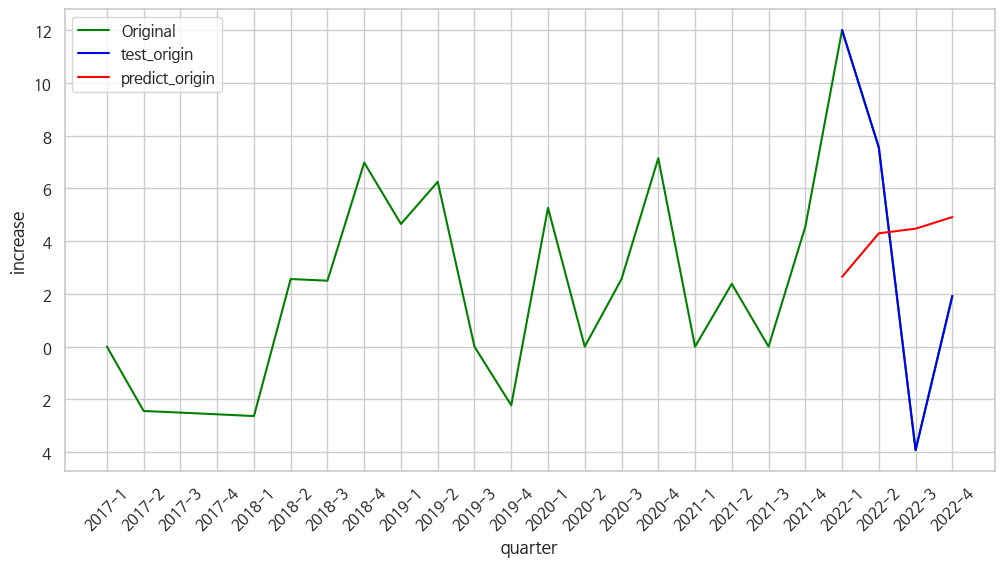

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.304668
std      7.682454
min     -8.393764
25%     -4.340978
50%      0.129792
75%      4.775438
max      9.352849
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 72ms/step
[[0.50518656]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 4.1217942237854 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

2181774300.0
1.0159956
-17028754.0
4.121794


In [71]:
ap_eng.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-7b7cd0f2b294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_eng.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_eng

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,외국어학원,2.677392e+09,1.000000,0.000000,-3.347717e+07
1,2017-2,외국어학원,2.842181e+09,1.061548,-2.439024,-2.640564e+07
2,2017-3,외국어학원,3.032715e+09,1.067038,-2.500000,-2.929454e+07
3,2017-4,외국어학원,2.537955e+09,0.836859,-2.564103,-2.651756e+07
4,2018-1,외국어학원,2.888339e+09,1.138058,-2.631579,-1.442998e+07
5,2018-2,외국어학원,3.048932e+09,1.055601,2.564103,-3.267217e+06
6,2018-3,외국어학원,2.830271e+09,0.928283,2.500000,-1.329541e+07
7,2018-4,외국어학원,2.383295e+09,0.842073,6.976744,-1.066739e+07
8,2019-1,외국어학원,2.107303e+09,0.884197,4.651163,-3.076674e+07
9,2019-2,외국어학원,2.611857e+09,1.239431,6.250000,-1.151425e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_eng[['성장성', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -3.347717e+07   0.000000
1   1.061548 -2.640564e+07  -2.439024
2   1.067038 -2.929454e+07  -2.500000
3   0.836859 -2.651756e+07  -2.564103
4   1.138058 -1.442998e+07  -2.631579
5   1.055601 -3.267217e+06   2.564103
6   0.928283 -1.329541e+07   2.500000
7   0.842073 -1.066739e+07   6.976744
8   0.884197 -3.076674e+07   4.651163
9   1.239431 -1.151425e+07   6.250000
10  1.206855 -1.312847e+07   0.000000
11  0.638009 -9.909515e+06  -2.222222
12  0.952482 -3.120822e+06   5.263158
13  1.388478  9.156522e+06   0.000000
14  0.790478 -6.609104e+06   2.564103
15  0.790414 -1.217486e+07   7.142857
16  1.256944 -5.310883e+06   0.000000
17  1.223329  1.471956e+06   2.380952
18  0.936079 -5.655098e+06   0.000000
19  1.234754  1.032821e+07   4.545455
20  1.066087  8.891275e+06  12.000000
21  1.192891  1.348941e+07   7.547170
22  0.926321  9.189092e+06  -3.921569
23  0.991681  1.156154e+07   1.923077
24  1.015996 -1.702875e+07   4.121794
------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.47126849 0.95895215 0.36708981]
 [0.50366717 0.35021535 0.50518658]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2540
Epoch 1: val_loss improved from inf to 0.21257, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2540 - val_loss: 0.2126
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2530
Epoch 2: val_loss improved from 0.21257 to 0.21160, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.2530 - val_loss: 0.2116
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2521
Epoch 3: val_loss improved from 0.21160 to 0.21065, saving model to stock_model.h5
1/1 [==============================] - 0s 134ms/step - loss: 0.2521 - val_loss: 0.2106
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2511
Epoch 4: val_loss improved from 0.21065 to 0.20969, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.2511 - val_loss: 0.2097
Epoch 5/300
1/1 [==============

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 667ms/step
[[0.4672159 ]
 [0.4784168 ]
 [0.40903604]
 [0.3029876 ]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.467216
2022-3,0.867854,0.478417
2022-4,0.854034,0.409036
2023-1,0.248311,0.302988


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_eng의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.467216,3.755927e+09,2.640195e+09,1.115732e+09
2022-3,0.867854,0.478417,3.479193e+09,2.663651e+09,8.155417e+08
2022-4,0.854034,0.409036,3.450251e+09,2.518357e+09,9.318939e+08
2023-1,0.248311,0.302988,2.181774e+09,2.296276e+09,-1.145014e+08


In [82]:
df_test = df_test.reset_index()

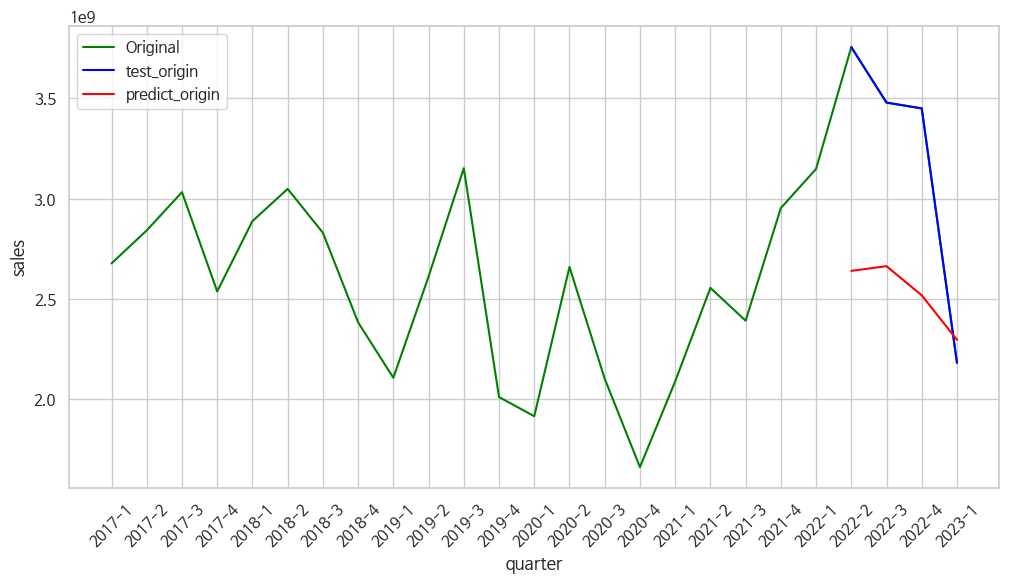

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.871665e+08
std      5.485469e+08
min     -1.145014e+08
25%      5.830309e+08
50%      8.737178e+08
75%      9.778534e+08
max      1.115732e+09
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.35687497]]
--------------------------------------------------------------------------------
예측된 매출  : 2409124096.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.677392e+09 -3.347717e+07   0.000000
1   2.842181e+09 -2.640564e+07  -2.439024
2   3.032715e+09 -2.929454e+07  -2.500000
3   2.537955e+09 -2.651756e+07  -2.564103
4   2.888339e+09 -1.442998e+07  -2.631579
5   3.048932e+09 -3.267217e+06   2.564103
6   2.830271e+09 -1.329541e+07   2.500000
7   2.383295e+09 -1.066739e+07   6.976744
8   2.107303e+09 -3.076674e+07   4.651163
9   2.611857e+09 -1.151425e+07   6.250000
10  3.152134e+09 -1.312847e+07   0.000000
11  2.011091e+09 -9.909515e+06  -2.222222
12  1.915528e+09 -3.120822e+06   5.263158
13  2.659667e+09  9.156522e+06   0.000000
14  2.102409e+09 -6.609104e+06   2.564103
15  1.661773e+09 -1.217486e+07   7.142857
16  2.088755e+09 -5.310883e+06   0.000000
17  2.555235e+09  1.471956e+06   2.380952
18  2.391902e+09 -5.655098e+06   0.000000
19  2.953411e+09  1.032821e+07   4.545455
20  3.148592e+09  8.891275e+06  12.000000
21  3.755927e+09  1.348941e+07   7.547170
22  3.479193e+09  9.189092e+06  -3

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.85403387 0.95895215 0.36708981]
 [0.24831095 0.35021535 0.50518658]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2782
Epoch 1: val_loss improved from inf to 0.47186, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2782 - val_loss: 0.4719
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 2: val_loss improved from 0.47186 to 0.47054, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.2772 - val_loss: 0.4705
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2762
Epoch 3: val_loss improved from 0.47054 to 0.46923, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.2762 - val_loss: 0.4692
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2753
Epoch 4: val_loss improved from 0.46923 to 0.46791, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.2753 - val_loss: 0.4679
Epoch 5/300
1/1 [==============

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 756ms/step
[[0.589577 ]
 [0.6951096]
 [0.6326278]
 [0.5106573]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.739380,0.589577
2022-3,0.384175,0.695110
2022-4,0.471268,0.632628
2023-1,0.503667,0.510657


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 3].values       # 성장성이 ap_eng의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.739380,0.589577,1.192891,1.080468,0.112423
2022-3,0.384175,0.695110,0.926321,1.159667,-0.233346
2022-4,0.471268,0.632628,0.991681,1.112776,-0.121095
2023-1,0.503667,0.510657,1.015996,1.021242,-0.005246


In [95]:
df_test = df_test.reset_index()

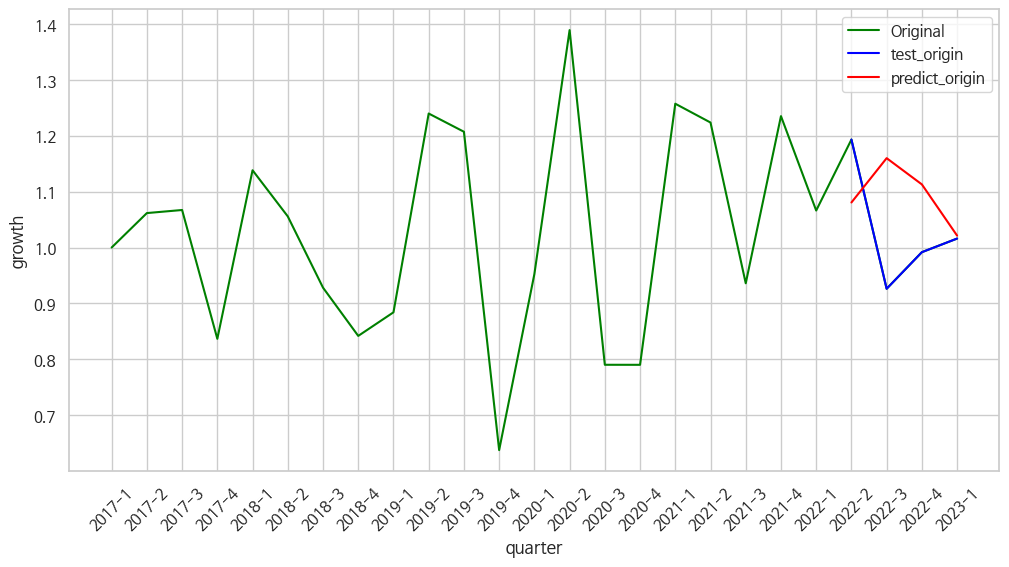

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.061816
std      0.148880
min     -0.233346
25%     -0.149158
50%     -0.063170
75%      0.024171
max      0.112423
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 36ms/step
[[0.5161713]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0253795385360718 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_eng.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   2.677392e+09  1.000000   0.000000
1   2.842181e+09  1.061548  -2.439024
2   3.032715e+09  1.067038  -2.500000
3   2.537955e+09  0.836859  -2.564103
4   2.888339e+09  1.138058  -2.631579
5   3.048932e+09  1.055601   2.564103
6   2.830271e+09  0.928283   2.500000
7   2.383295e+09  0.842073   6.976744
8   2.107303e+09  0.884197   4.651163
9   2.611857e+09  1.239431   6.250000
10  3.152134e+09  1.206855   0.000000
11  2.011091e+09  0.638009  -2.222222
12  1.915528e+09  0.952482   5.263158
13  2.659667e+09  1.388478   0.000000
14  2.102409e+09  0.790478   2.564103
15  1.661773e+09  0.790414   7.142857
16  2.088755e+09  1.256944   0.000000
17  2.555235e+09  1.223329   2.380952
18  2.391902e+09  0.936079   0.000000
19  2.953411e+09  1.234754   4.545455
20  3.148592e+09  1.066087  12.000000
21  3.755927e+09  1.192891   7.547170
22  3.479193e+09  0.926321  -3.921569
23  3.450251e+09  0.991681   1.923077
24  2.181774e+09  1.015996   4.121794
------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.85403387 0.47126849 0.36708981]
 [0.24831095 0.50366717 0.50518658]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2135
Epoch 1: val_loss improved from inf to 0.57458, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2135 - val_loss: 0.5746
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2126
Epoch 2: val_loss improved from 0.57458 to 0.57301, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2126 - val_loss: 0.5730
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2116
Epoch 3: val_loss improved from 0.57301 to 0.57144, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2116 - val_loss: 0.5714
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2107
Epoch 4: val_loss improved from 0.57144 to 0.56989, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2107 - val_loss: 0.5699
Epoch 5/300
1/1 [=================

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 658ms/step
[[0.51966155]
 [0.57982963]
 [0.5254921 ]
 [0.40272385]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,1.000000,0.519662
2022-3,0.908439,0.579830
2022-4,0.958952,0.525492
2023-1,0.350215,0.402724


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 5].values       # 시장성이 ap_eng의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,1.000000,0.519662,1.348941e+07,-9070444.0,2.255986e+07
2022-3,0.908439,0.579830,9.189092e+06,-6244554.5,1.543365e+07
2022-4,0.958952,0.525492,1.156154e+07,-8796604.0,2.035814e+07
2023-1,0.350215,0.402724,-1.702875e+07,-14562608.0,-2.466146e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


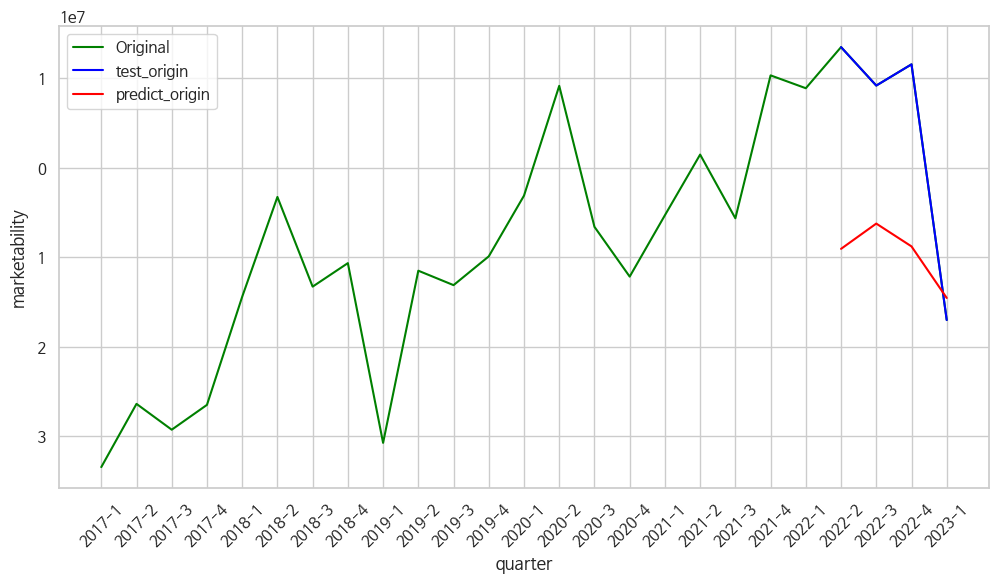

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.397137e+07
std      1.135610e+07
min     -2.466146e+06
25%      1.095870e+07
50%      1.789589e+07
75%      2.090857e+07
max      2.255986e+07
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 30ms/step
[[0.42829508]]
--------------------------------------------------------------------------------
예측된 시장성  : -13361615.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '시장성']]
y = ap_eng.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.677392e+09  1.000000 -3.347717e+07
1   2.842181e+09  1.061548 -2.640564e+07
2   3.032715e+09  1.067038 -2.929454e+07
3   2.537955e+09  0.836859 -2.651756e+07
4   2.888339e+09  1.138058 -1.442998e+07
5   3.048932e+09  1.055601 -3.267217e+06
6   2.830271e+09  0.928283 -1.329541e+07
7   2.383295e+09  0.842073 -1.066739e+07
8   2.107303e+09  0.884197 -3.076674e+07
9   2.611857e+09  1.239431 -1.151425e+07
10  3.152134e+09  1.206855 -1.312847e+07
11  2.011091e+09  0.638009 -9.909515e+06
12  1.915528e+09  0.952482 -3.120822e+06
13  2.659667e+09  1.388478  9.156522e+06
14  2.102409e+09  0.790478 -6.609104e+06
15  1.661773e+09  0.790414 -1.217486e+07
16  2.088755e+09  1.256944 -5.310883e+06
17  2.555235e+09  1.223329  1.471956e+06
18  2.391902e+09  0.936079 -5.655098e+06
19  2.953411e+09  1.234754  1.032821e+07
20  3.148592e+09  1.066087  8.891275e+06
21  3.755927e+09  1.192891  1.348941e+07
22  3.479193e+09  0.926321  9.189092e+06
23  3.450251e+09

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.85403387 0.47126849 0.95895215]
 [0.24831095 0.50366717 0.35021535]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1934
Epoch 1: val_loss improved from inf to 0.31256, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1934 - val_loss: 0.3126
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1925
Epoch 2: val_loss improved from 0.31256 to 0.31131, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1925 - val_loss: 0.3113
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1916
Epoch 3: val_loss improved from 0.31131 to 0.31007, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1916 - val_loss: 0.3101
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1908
Epoch 4: val_loss improved from 0.31007 to 0.30884, saving model to stock_model.h5
1/1 [==============================] - 0s 122ms/step - loss: 0.1908 - val_loss: 0.3088
Epoch 5/300
1/1 [================

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 657ms/step
[[0.54748243]
 [0.57390493]
 [0.6151312 ]
 [0.5654419 ]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.720327,0.547482
2022-3,0.000000,0.573905
2022-4,0.367090,0.615131
2023-1,0.505187,0.565442


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_eng의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.720327,0.547482,7.547170,4.795211,2.751959
2022-3,0.000000,0.573905,-3.921569,5.215899,-9.137467
2022-4,0.367090,0.615131,1.923077,5.872285,-3.949208
2023-1,0.505187,0.565442,4.121794,5.081154,-0.959360


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


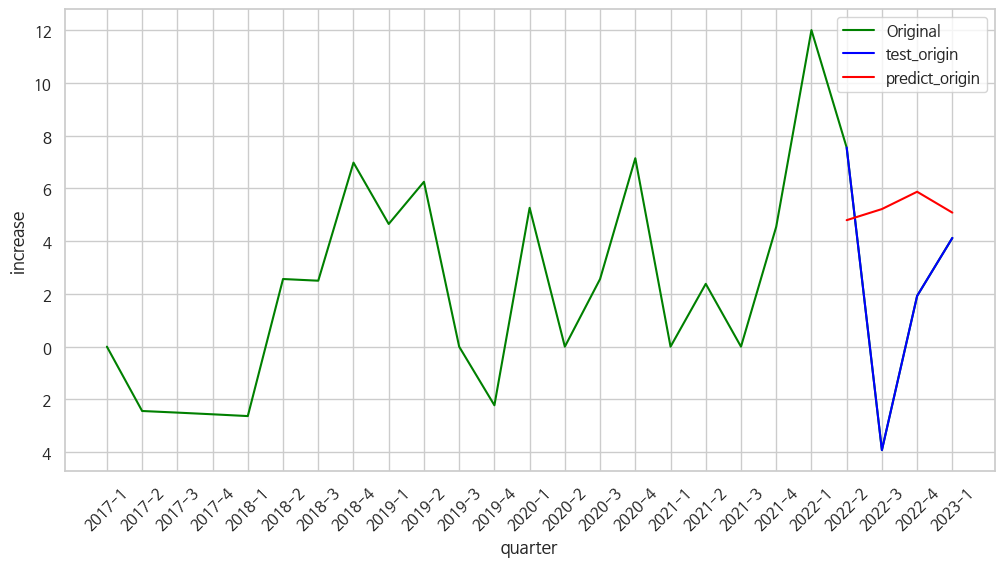

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -2.823519
std      5.023085
min     -9.137467
25%     -5.246273
50%     -2.454284
75%     -0.031530
max      2.751959
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.48588023]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 3.814406633377075 


### 추가


In [123]:
ap_eng.loc[25] = ['2023-2', '외국어학원수리리', sales, growth, increase, marketability]

<ipython-input-123-56cec97a008e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_eng.loc[25] = ['2023-2', '외국어학원수리리', sales, growth, increase, marketability]


In [124]:
ap_eng

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,외국어학원,2.677392e+09,1.000000,0.000000,-3.347717e+07
1,2017-2,외국어학원,2.842181e+09,1.061548,-2.439024,-2.640564e+07
2,2017-3,외국어학원,3.032715e+09,1.067038,-2.500000,-2.929454e+07
3,2017-4,외국어학원,2.537955e+09,0.836859,-2.564103,-2.651756e+07
4,2018-1,외국어학원,2.888339e+09,1.138058,-2.631579,-1.442998e+07
5,2018-2,외국어학원,3.048932e+09,1.055601,2.564103,-3.267217e+06
6,2018-3,외국어학원,2.830271e+09,0.928283,2.500000,-1.329541e+07
7,2018-4,외국어학원,2.383295e+09,0.842073,6.976744,-1.066739e+07
8,2019-1,외국어학원,2.107303e+09,0.884197,4.651163,-3.076674e+07
9,2019-2,외국어학원,2.611857e+09,1.239431,6.250000,-1.151425e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_eng[['성장성', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -3.347717e+07   0.000000
1   1.061548 -2.640564e+07  -2.439024
2   1.067038 -2.929454e+07  -2.500000
3   0.836859 -2.651756e+07  -2.564103
4   1.138058 -1.442998e+07  -2.631579
5   1.055601 -3.267217e+06   2.564103
6   0.928283 -1.329541e+07   2.500000
7   0.842073 -1.066739e+07   6.976744
8   0.884197 -3.076674e+07   4.651163
9   1.239431 -1.151425e+07   6.250000
10  1.206855 -1.312847e+07   0.000000
11  0.638009 -9.909515e+06  -2.222222
12  0.952482 -3.120822e+06   5.263158
13  1.388478  9.156522e+06   0.000000
14  0.790478 -6.609104e+06   2.564103
15  0.790414 -1.217486e+07   7.142857
16  1.256944 -5.310883e+06   0.000000
17  1.223329  1.471956e+06   2.380952
18  0.936079 -5.655098e+06   0.000000
19  1.234754  1.032821e+07   4.545455
20  1.066087  8.891275e+06  12.000000
21  1.192891  1.348941e+07   7.547170
22  0.926321  9.189092e+06  -3.921569
23  0.991681  1.156154e+07   1.923077
24  1.015996 -1.702875e+07   4.121794
25  1.025380

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.50366717 0.35021535 0.50518658]
 [0.51617126 0.42829509 0.48588022]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2539
Epoch 1: val_loss improved from inf to 0.31752, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2539 - val_loss: 0.3175
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2530
Epoch 2: val_loss improved from 0.31752 to 0.31626, saving model to stock_model.h5
1/1 [==============================] - 0s 113ms/step - loss: 0.2530 - val_loss: 0.3163
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2520
Epoch 3: val_loss improved from 0.31626 to 0.31501, saving model to stock_model.h5
1/1 [==============================] - 0s 147ms/step - loss: 0.2520 - val_loss: 0.3150
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2511
Epoch 4: val_loss improved from 0.31501 to 0.31377, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.2511 - val_loss: 0.3138
Epoch 5/300
1/1 [==============

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 671ms/step
[[0.5695949 ]
 [0.4842515 ]
 [0.35697618]
 [0.41914985]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.867854,0.569595
2022-4,0.854034,0.484251
2023-1,0.248311,0.356976
2023-2,0.356875,0.419150


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_eng의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.867854,0.569595,3.479193e+09,2.854592e+09,624600730.0
2022-4,0.854034,0.484251,3.450251e+09,2.675870e+09,774380913.0
2023-1,0.248311,0.356976,2.181774e+09,2.409336e+09,-227561728.0
2023-2,0.356875,0.419150,2.409124e+09,2.539537e+09,-130413312.0


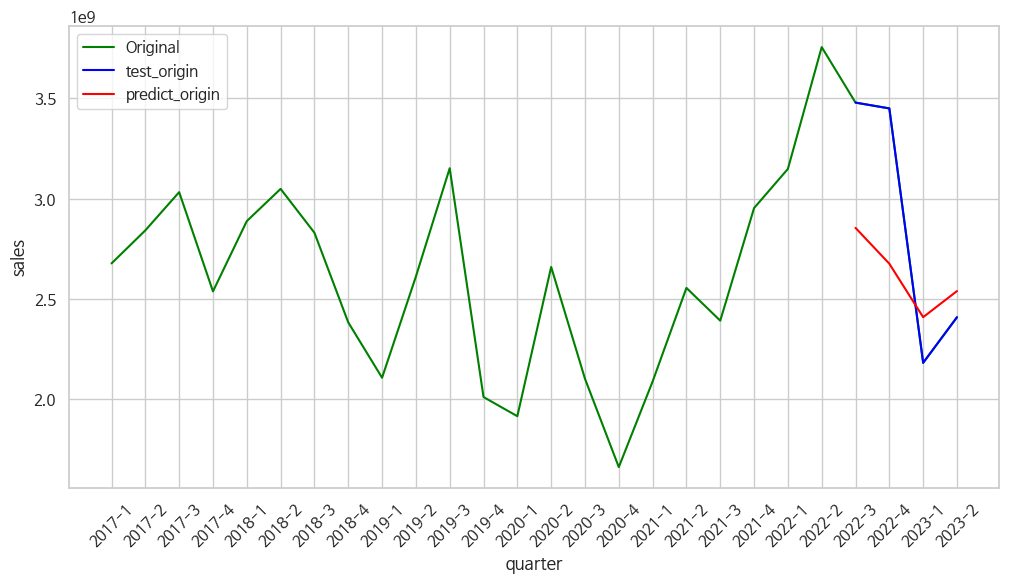

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.602517e+08
std      5.123996e+08
min     -2.275617e+08
25%     -1.547004e+08
50%      2.470937e+08
75%      6.620458e+08
max      7.743809e+08
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.41510952]]
--------------------------------------------------------------------------------
예측된 매출  : 2531076096.0 


### 성장성

In [137]:
X = ap_eng[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.677392e+09 -3.347717e+07   0.000000
1   2.842181e+09 -2.640564e+07  -2.439024
2   3.032715e+09 -2.929454e+07  -2.500000
3   2.537955e+09 -2.651756e+07  -2.564103
4   2.888339e+09 -1.442998e+07  -2.631579
5   3.048932e+09 -3.267217e+06   2.564103
6   2.830271e+09 -1.329541e+07   2.500000
7   2.383295e+09 -1.066739e+07   6.976744
8   2.107303e+09 -3.076674e+07   4.651163
9   2.611857e+09 -1.151425e+07   6.250000
10  3.152134e+09 -1.312847e+07   0.000000
11  2.011091e+09 -9.909515e+06  -2.222222
12  1.915528e+09 -3.120822e+06   5.263158
13  2.659667e+09  9.156522e+06   0.000000
14  2.102409e+09 -6.609104e+06   2.564103
15  1.661773e+09 -1.217486e+07   7.142857
16  2.088755e+09 -5.310883e+06   0.000000
17  2.555235e+09  1.471956e+06   2.380952
18  2.391902e+09 -5.655098e+06   0.000000
19  2.953411e+09  1.032821e+07   4.545455
20  3.148592e+09  8.891275e+06  12.000000
21  3.755927e+09  1.348941e+07   7.547170
22  3.479193e+09  9.189092e+06  -3

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24831095 0.35021535 0.50518658]
 [0.35687499 0.42829509 0.48588022]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3428
Epoch 1: val_loss improved from inf to 0.41718, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3428 - val_loss: 0.4172
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3418
Epoch 2: val_loss improved from 0.41718 to 0.41574, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3418 - val_loss: 0.4157
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3407
Epoch 3: val_loss improved from 0.41574 to 0.41431, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3407 - val_loss: 0.4143
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3397
Epoch 4: val_loss improved from 0.41431 to 0.41287, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3397 - val_loss: 0.4129
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 963ms/step
[[0.7938604 ]
 [0.7146681 ]
 [0.5766378 ]
 [0.58496547]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.384175,0.793860
2022-4,0.471268,0.714668
2023-1,0.503667,0.576638
2023-2,0.516171,0.584965


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 3].values       # 성장성이 ap_eng의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.384175,0.793860,0.926321,1.233776,-0.307456
2022-4,0.471268,0.714668,0.991681,1.174345,-0.182664
2023-1,0.503667,0.576638,1.015996,1.070758,-0.054762
2023-2,0.516171,0.584965,1.025380,1.077007,-0.051628


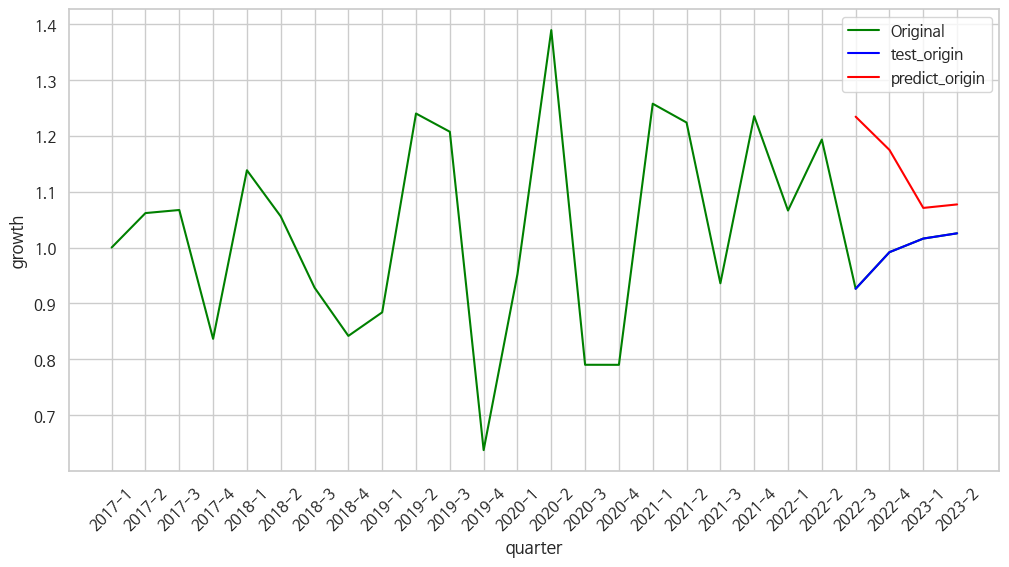

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.149127
std      0.121934
min     -0.307456
25%     -0.213862
50%     -0.118713
75%     -0.053979
max     -0.051628
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 32ms/step
[[0.45391694]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9786596298217773 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_eng.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   2.677392e+09  1.000000   0.000000
1   2.842181e+09  1.061548  -2.439024
2   3.032715e+09  1.067038  -2.500000
3   2.537955e+09  0.836859  -2.564103
4   2.888339e+09  1.138058  -2.631579
5   3.048932e+09  1.055601   2.564103
6   2.830271e+09  0.928283   2.500000
7   2.383295e+09  0.842073   6.976744
8   2.107303e+09  0.884197   4.651163
9   2.611857e+09  1.239431   6.250000
10  3.152134e+09  1.206855   0.000000
11  2.011091e+09  0.638009  -2.222222
12  1.915528e+09  0.952482   5.263158
13  2.659667e+09  1.388478   0.000000
14  2.102409e+09  0.790478   2.564103
15  1.661773e+09  0.790414   7.142857
16  2.088755e+09  1.256944   0.000000
17  2.555235e+09  1.223329   2.380952
18  2.391902e+09  0.936079   0.000000
19  2.953411e+09  1.234754   4.545455
20  3.148592e+09  1.066087  12.000000
21  3.755927e+09  1.192891   7.547170
22  3.479193e+09  0.926321  -3.921569
23  3.450251e+09  0.991681   1.923077
24  2.181774e+09  1.015996   4.121794
25  2.409124

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24831095 0.50366717 0.50518658]
 [0.35687499 0.51617126 0.48588022]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2660
Epoch 1: val_loss improved from inf to 0.60373, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2660 - val_loss: 0.6037
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2650
Epoch 2: val_loss improved from 0.60373 to 0.60196, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2650 - val_loss: 0.6020
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2640
Epoch 3: val_loss improved from 0.60196 to 0.60020, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2640 - val_loss: 0.6002
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2630
Epoch 4: val_loss improved from 0.60020 to 0.59844, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2630 - val_loss: 0.5984
Epoch 5/300
1/1 [=================

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 656ms/step
[[0.6281051 ]
 [0.5616561 ]
 [0.43047917]
 [0.4629699 ]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.908439,0.628105
2022-4,0.958952,0.561656
2023-1,0.350215,0.430479
2023-2,0.428295,0.462970


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 5].values       # 시장성이 ap_eng의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.908439,0.628105,9.189092e+06,-3977220.5,1.316631e+07
2022-4,0.958952,0.561656,1.156154e+07,-7098102.5,1.865964e+07
2023-1,0.350215,0.430479,-1.702875e+07,-13259036.0,-3.769718e+06
2023-2,0.428295,0.462970,-1.336162e+07,-11733058.0,-1.628557e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


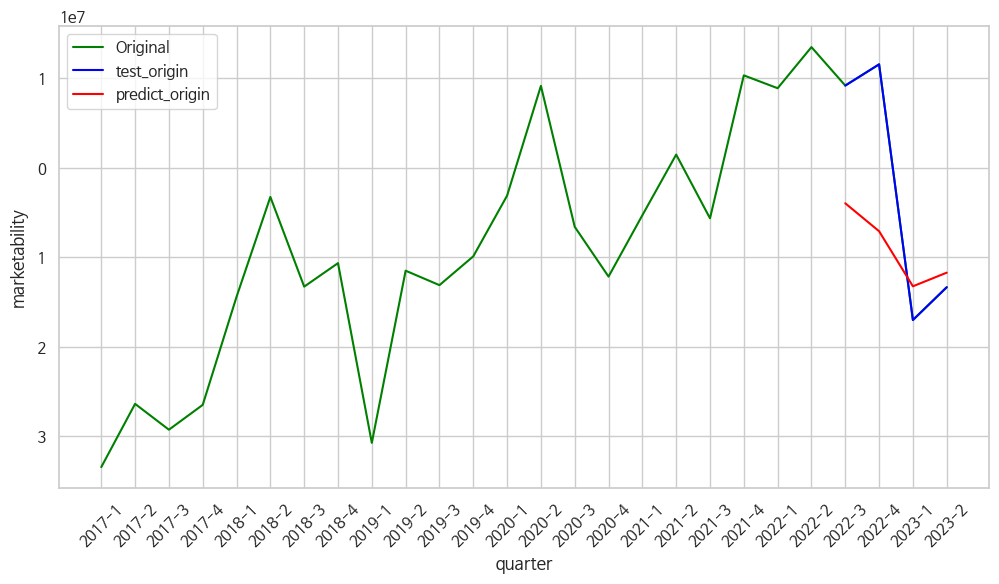

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.606919e+06
std      1.101198e+07
min     -3.769718e+06
25%     -2.163847e+06
50%      5.768878e+06
75%      1.453964e+07
max      1.865964e+07
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.40666994]]
--------------------------------------------------------------------------------
예측된 시장성  : -14377274.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '시장성']]
y = ap_eng.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.677392e+09  1.000000 -3.347717e+07
1   2.842181e+09  1.061548 -2.640564e+07
2   3.032715e+09  1.067038 -2.929454e+07
3   2.537955e+09  0.836859 -2.651756e+07
4   2.888339e+09  1.138058 -1.442998e+07
5   3.048932e+09  1.055601 -3.267217e+06
6   2.830271e+09  0.928283 -1.329541e+07
7   2.383295e+09  0.842073 -1.066739e+07
8   2.107303e+09  0.884197 -3.076674e+07
9   2.611857e+09  1.239431 -1.151425e+07
10  3.152134e+09  1.206855 -1.312847e+07
11  2.011091e+09  0.638009 -9.909515e+06
12  1.915528e+09  0.952482 -3.120822e+06
13  2.659667e+09  1.388478  9.156522e+06
14  2.102409e+09  0.790478 -6.609104e+06
15  1.661773e+09  0.790414 -1.217486e+07
16  2.088755e+09  1.256944 -5.310883e+06
17  2.555235e+09  1.223329  1.471956e+06
18  2.391902e+09  0.936079 -5.655098e+06
19  2.953411e+09  1.234754  1.032821e+07
20  3.148592e+09  1.066087  8.891275e+06
21  3.755927e+09  1.192891  1.348941e+07
22  3.479193e+09  0.926321  9.189092e+06
23  3.450251e+09

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24831095 0.50366717 0.35021535]
 [0.35687499 0.51617126 0.42829509]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1829
Epoch 1: val_loss improved from inf to 0.37623, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1829 - val_loss: 0.3762
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1820
Epoch 2: val_loss improved from 0.37623 to 0.37475, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1820 - val_loss: 0.3747
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1812
Epoch 3: val_loss improved from 0.37475 to 0.37327, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1812 - val_loss: 0.3733
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1804
Epoch 4: val_loss improved from 0.37327 to 0.37179, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.1804 - val_loss: 0.3718
Epoch 5/300
1/1 [=================

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 996ms/step
[[0.56677955]
 [0.607596  ]
 [0.55843014]
 [0.47972932]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.000000,0.566780
2022-4,0.367090,0.607596
2023-1,0.505187,0.558430
2023-2,0.485880,0.479729


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_eng의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.000000,0.566780,-3.921569,5.102451,-9.024020
2022-4,0.367090,0.607596,1.923077,5.752313,-3.829236
2023-1,0.505187,0.558430,4.121794,4.969515,-0.847721
2023-2,0.485880,0.479729,3.814407,3.716475,0.097932


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


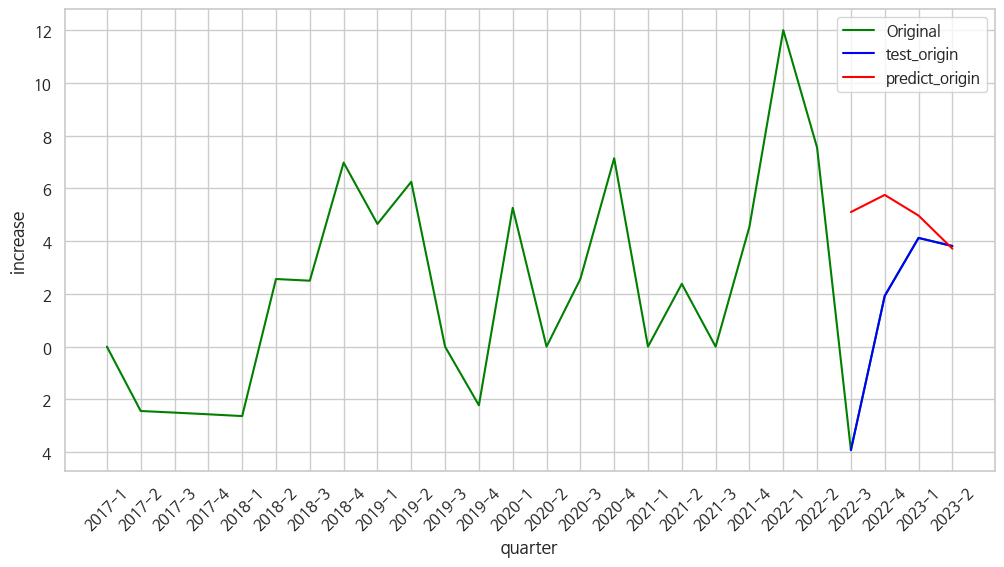

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -3.400761
std      4.105423
min     -9.024020
25%     -5.127932
50%     -2.338478
75%     -0.611308
max      0.097932
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.31752244]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.1338865756988525 


### 추가

In [173]:
ap_eng.loc[26] = ['2023-3', '외국어학원', sales, growth, increase, marketability]

<ipython-input-173-61bbcf0f4d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_eng.loc[26] = ['2023-3', '외국어학원', sales, growth, increase, marketability]


In [174]:
ap_eng

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,외국어학원,2.677392e+09,1.000000,0.000000,-3.347717e+07
1,2017-2,외국어학원,2.842181e+09,1.061548,-2.439024,-2.640564e+07
2,2017-3,외국어학원,3.032715e+09,1.067038,-2.500000,-2.929454e+07
3,2017-4,외국어학원,2.537955e+09,0.836859,-2.564103,-2.651756e+07
4,2018-1,외국어학원,2.888339e+09,1.138058,-2.631579,-1.442998e+07
5,2018-2,외국어학원,3.048932e+09,1.055601,2.564103,-3.267217e+06
6,2018-3,외국어학원,2.830271e+09,0.928283,2.500000,-1.329541e+07
7,2018-4,외국어학원,2.383295e+09,0.842073,6.976744,-1.066739e+07
8,2019-1,외국어학원,2.107303e+09,0.884197,4.651163,-3.076674e+07
9,2019-2,외국어학원,2.611857e+09,1.239431,6.250000,-1.151425e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_eng[['성장성', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -3.347717e+07   0.000000
1   1.061548 -2.640564e+07  -2.439024
2   1.067038 -2.929454e+07  -2.500000
3   0.836859 -2.651756e+07  -2.564103
4   1.138058 -1.442998e+07  -2.631579
5   1.055601 -3.267217e+06   2.564103
6   0.928283 -1.329541e+07   2.500000
7   0.842073 -1.066739e+07   6.976744
8   0.884197 -3.076674e+07   4.651163
9   1.239431 -1.151425e+07   6.250000
10  1.206855 -1.312847e+07   0.000000
11  0.638009 -9.909515e+06  -2.222222
12  0.952482 -3.120822e+06   5.263158
13  1.388478  9.156522e+06   0.000000
14  0.790478 -6.609104e+06   2.564103
15  0.790414 -1.217486e+07   7.142857
16  1.256944 -5.310883e+06   0.000000
17  1.223329  1.471956e+06   2.380952
18  0.936079 -5.655098e+06   0.000000
19  1.234754  1.032821e+07   4.545455
20  1.066087  8.891275e+06  12.000000
21  1.192891  1.348941e+07   7.547170
22  0.926321  9.189092e+06  -3.921569
23  0.991681  1.156154e+07   1.923077
24  1.015996 -1.702875e+07   4.121794
25  1.025380

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.51617126 0.42829509 0.48588022]
 [0.4539169  0.40666995 0.31752243]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2539
Epoch 1: val_loss improved from inf to 0.37539, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2539 - val_loss: 0.3754
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2530
Epoch 2: val_loss improved from 0.37539 to 0.37395, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2530 - val_loss: 0.3739
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2520
Epoch 3: val_loss improved from 0.37395 to 0.37251, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2520 - val_loss: 0.3725
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2511
Epoch 4: val_loss improved from 0.37251 to 0.37108, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2511 - val_loss: 0.3711
Epoch 5/300
1/1 [=================

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 676ms/step
[[0.5145615 ]
 [0.37863302]
 [0.4452628 ]
 [0.4431354 ]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.854034,0.514561
2023-1,0.248311,0.378633
2023-2,0.356875,0.445263
2023-3,0.415109,0.443135


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_eng의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.854034,0.514561,3.450251e+09,2.739344e+09,710907505.0
2023-1,0.248311,0.378633,2.181774e+09,2.454689e+09,-272914432.0
2023-2,0.356875,0.445263,2.409124e+09,2.594222e+09,-185097728.0
2023-3,0.415109,0.443135,2.531076e+09,2.589767e+09,-58690560.0


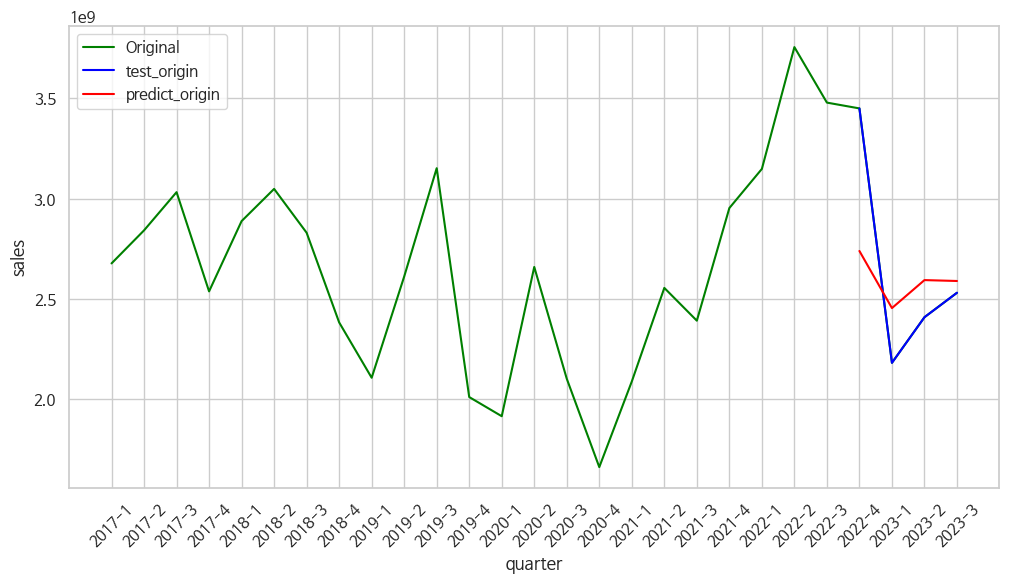

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.855120e+07
std      4.502402e+08
min     -2.729144e+08
25%     -2.070519e+08
50%     -1.218941e+08
75%      1.337090e+08
max      7.109075e+08
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 31ms/step
[[0.4290703]]
--------------------------------------------------------------------------------
예측된 매출  : 2560312064.0 


### 성장성

In [187]:
X = ap_eng[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   2.677392e+09 -3.347717e+07   0.000000
1   2.842181e+09 -2.640564e+07  -2.439024
2   3.032715e+09 -2.929454e+07  -2.500000
3   2.537955e+09 -2.651756e+07  -2.564103
4   2.888339e+09 -1.442998e+07  -2.631579
5   3.048932e+09 -3.267217e+06   2.564103
6   2.830271e+09 -1.329541e+07   2.500000
7   2.383295e+09 -1.066739e+07   6.976744
8   2.107303e+09 -3.076674e+07   4.651163
9   2.611857e+09 -1.151425e+07   6.250000
10  3.152134e+09 -1.312847e+07   0.000000
11  2.011091e+09 -9.909515e+06  -2.222222
12  1.915528e+09 -3.120822e+06   5.263158
13  2.659667e+09  9.156522e+06   0.000000
14  2.102409e+09 -6.609104e+06   2.564103
15  1.661773e+09 -1.217486e+07   7.142857
16  2.088755e+09 -5.310883e+06   0.000000
17  2.555235e+09  1.471956e+06   2.380952
18  2.391902e+09 -5.655098e+06   0.000000
19  2.953411e+09  1.032821e+07   4.545455
20  3.148592e+09  8.891275e+06  12.000000
21  3.755927e+09  1.348941e+07   7.547170
22  3.479193e+09  9.189092e+06  -3

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.35687499 0.42829509 0.48588022]
 [0.41510949 0.40666995 0.31752243]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3428
Epoch 1: val_loss improved from inf to 0.39162, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3428 - val_loss: 0.3916
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3418
Epoch 2: val_loss improved from 0.39162 to 0.39017, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.3418 - val_loss: 0.3902
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3407
Epoch 3: val_loss improved from 0.39017 to 0.38873, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.3407 - val_loss: 0.3887
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3397
Epoch 4: val_loss improved from 0.38873 to 0.38729, saving model to stock_model.h5
1/1 [==============================] - 0s 117ms/step - loss: 0.3397 - val_loss: 0.3873
Epoch 5/300
1/1 [===============

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 724ms/step
[[0.7146681 ]
 [0.5766378 ]
 [0.58496547]
 [0.45391697]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.471268,0.714668
2023-1,0.503667,0.576638
2023-2,0.516171,0.584965
2023-3,0.453917,0.453917


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 3].values       # 성장성이 ap_eng의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.471268,0.714668,0.991681,1.174345,-0.182664
2023-1,0.503667,0.576638,1.015996,1.070758,-0.054762
2023-2,0.516171,0.584965,1.025380,1.077007,-0.051628
2023-3,0.453917,0.453917,0.978660,0.978660,0.000000


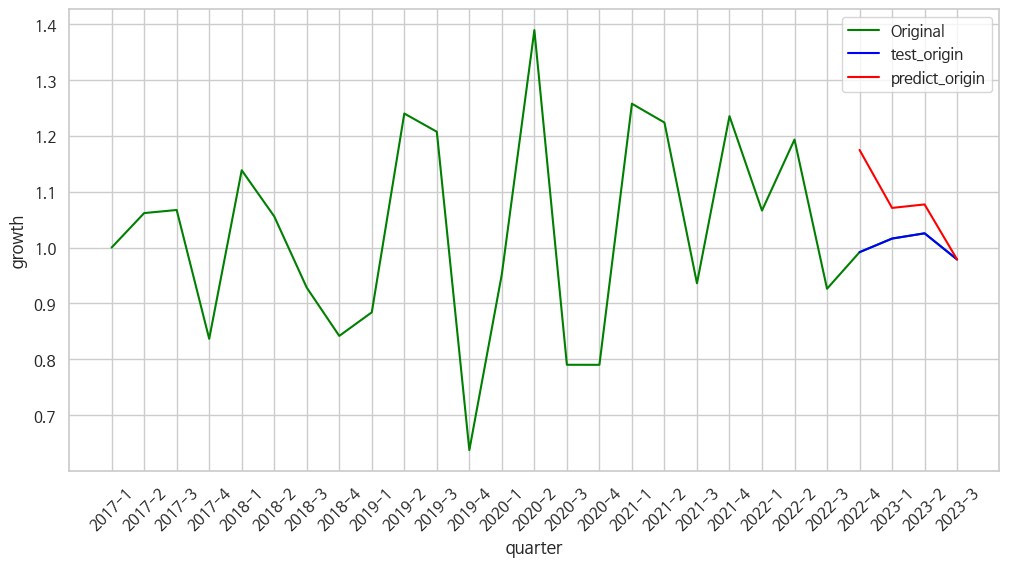

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.072263
std      0.077765
min     -0.182664
25%     -0.086737
50%     -0.053195
75%     -0.038721
max      0.000000
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.46499905]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9869764447212219 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_eng.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   2.677392e+09  1.000000   0.000000
1   2.842181e+09  1.061548  -2.439024
2   3.032715e+09  1.067038  -2.500000
3   2.537955e+09  0.836859  -2.564103
4   2.888339e+09  1.138058  -2.631579
5   3.048932e+09  1.055601   2.564103
6   2.830271e+09  0.928283   2.500000
7   2.383295e+09  0.842073   6.976744
8   2.107303e+09  0.884197   4.651163
9   2.611857e+09  1.239431   6.250000
10  3.152134e+09  1.206855   0.000000
11  2.011091e+09  0.638009  -2.222222
12  1.915528e+09  0.952482   5.263158
13  2.659667e+09  1.388478   0.000000
14  2.102409e+09  0.790478   2.564103
15  1.661773e+09  0.790414   7.142857
16  2.088755e+09  1.256944   0.000000
17  2.555235e+09  1.223329   2.380952
18  2.391902e+09  0.936079   0.000000
19  2.953411e+09  1.234754   4.545455
20  3.148592e+09  1.066087  12.000000
21  3.755927e+09  1.192891   7.547170
22  3.479193e+09  0.926321  -3.921569
23  3.450251e+09  0.991681   1.923077
24  2.181774e+09  1.015996   4.121794
25  2.409124

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.35687499 0.51617126 0.48588022]
 [0.41510949 0.4539169  0.31752243]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2660
Epoch 1: val_loss improved from inf to 0.63608, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2660 - val_loss: 0.6361
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2650
Epoch 2: val_loss improved from 0.63608 to 0.63417, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2650 - val_loss: 0.6342
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2640
Epoch 3: val_loss improved from 0.63417 to 0.63227, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2640 - val_loss: 0.6323
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2630
Epoch 4: val_loss improved from 0.63227 to 0.63037, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2630 - val_loss: 0.6304
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 694ms/step
[[0.5616561 ]
 [0.43047917]
 [0.4629699 ]
 [0.4066699 ]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.958952,0.561656
2023-1,0.350215,0.430479
2023-2,0.428295,0.462970
2023-3,0.406670,0.406670


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 5].values       # 시장성이 ap_eng의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.958952,0.561656,1.156154e+07,-7098102.5,1.865964e+07
2023-1,0.350215,0.430479,-1.702875e+07,-13259036.0,-3.769718e+06
2023-2,0.428295,0.462970,-1.336162e+07,-11733058.0,-1.628557e+06
2023-3,0.406670,0.406670,-1.437727e+07,-14377275.0,1.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


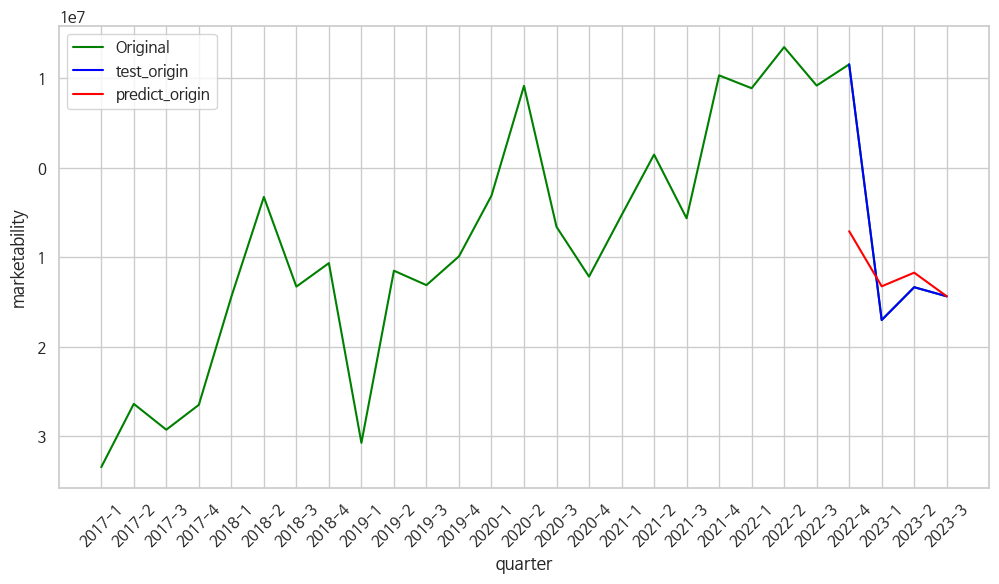

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.315341e+06
std      1.034536e+07
min     -3.769718e+06
25%     -2.163847e+06
50%     -8.142780e+05
75%      4.664911e+06
max      1.865964e+07
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 25ms/step
[[0.40915057]]
--------------------------------------------------------------------------------
예측된 시장성  : -14260767.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_eng[['분기당_매출_금액', '성장성', '시장성']]
y = ap_eng.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.677392e+09  1.000000 -3.347717e+07
1   2.842181e+09  1.061548 -2.640564e+07
2   3.032715e+09  1.067038 -2.929454e+07
3   2.537955e+09  0.836859 -2.651756e+07
4   2.888339e+09  1.138058 -1.442998e+07
5   3.048932e+09  1.055601 -3.267217e+06
6   2.830271e+09  0.928283 -1.329541e+07
7   2.383295e+09  0.842073 -1.066739e+07
8   2.107303e+09  0.884197 -3.076674e+07
9   2.611857e+09  1.239431 -1.151425e+07
10  3.152134e+09  1.206855 -1.312847e+07
11  2.011091e+09  0.638009 -9.909515e+06
12  1.915528e+09  0.952482 -3.120822e+06
13  2.659667e+09  1.388478  9.156522e+06
14  2.102409e+09  0.790478 -6.609104e+06
15  1.661773e+09  0.790414 -1.217486e+07
16  2.088755e+09  1.256944 -5.310883e+06
17  2.555235e+09  1.223329  1.471956e+06
18  2.391902e+09  0.936079 -5.655098e+06
19  2.953411e+09  1.234754  1.032821e+07
20  3.148592e+09  1.066087  8.891275e+06
21  3.755927e+09  1.192891  1.348941e+07
22  3.479193e+09  0.926321  9.189092e+06
23  3.450251e+09

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.35687499 0.51617126 0.42829509]
 [0.41510949 0.4539169  0.40666995]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1829
Epoch 1: val_loss improved from inf to 0.33458, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1829 - val_loss: 0.3346
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1820
Epoch 2: val_loss improved from 0.33458 to 0.33325, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.1820 - val_loss: 0.3332
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1812
Epoch 3: val_loss improved from 0.33325 to 0.33192, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1812 - val_loss: 0.3319
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1804
Epoch 4: val_loss improved from 0.33192 to 0.33060, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1804 - val_loss: 0.3306
Epoch 5/300
1/1 [=================

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.607596  ]
 [0.55843014]
 [0.47972932]
 [0.31752244]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.367090,0.607596
2023-1,0.505187,0.558430
2023-2,0.485880,0.479729
2023-3,0.317522,0.317522


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_eng의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.367090,0.607596,1.923077,5.752313,-3.829236
2023-1,0.505187,0.558430,4.121794,4.969515,-0.847721
2023-2,0.485880,0.479729,3.814407,3.716475,0.097932
2023-3,0.317522,0.317522,1.133887,1.133887,0.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


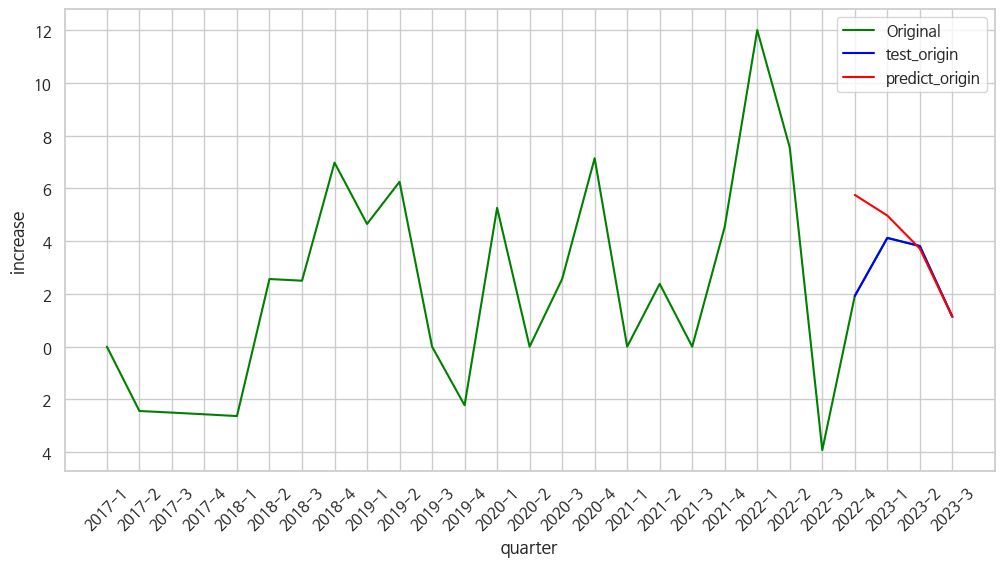

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_eng['분기'], ap_eng['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.144756
std      1.839330
min     -3.829236
25%     -1.593100
50%     -0.423861
75%      0.024483
max      0.097932
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 33ms/step
[[0.34423694]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.5592234134674072 


### 추가

In [223]:
ap_eng.loc[27] = ['2023-4', '외국어학원', sales, growth, increase, marketability]

<ipython-input-223-5d24300cd3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_eng.loc[27] = ['2023-4', '외국어학원', sales, growth, increase, marketability]


In [224]:
final_ap_eng = ap_eng
final_ap_eng

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,외국어학원,2.677392e+09,1.000000,0.000000,-3.347717e+07
1,2017-2,외국어학원,2.842181e+09,1.061548,-2.439024,-2.640564e+07
2,2017-3,외국어학원,3.032715e+09,1.067038,-2.500000,-2.929454e+07
3,2017-4,외국어학원,2.537955e+09,0.836859,-2.564103,-2.651756e+07
4,2018-1,외국어학원,2.888339e+09,1.138058,-2.631579,-1.442998e+07
5,2018-2,외국어학원,3.048932e+09,1.055601,2.564103,-3.267217e+06
6,2018-3,외국어학원,2.830271e+09,0.928283,2.500000,-1.329541e+07
7,2018-4,외국어학원,2.383295e+09,0.842073,6.976744,-1.066739e+07
8,2019-1,외국어학원,2.107303e+09,0.884197,4.651163,-3.076674e+07
9,2019-2,외국어학원,2.611857e+09,1.239431,6.250000,-1.151425e+07


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_eng[['성장성', '시장성', '순점포증감률']]
y = ap_eng.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -3.347717e+07   0.000000
1   1.061548 -2.640564e+07  -2.439024
2   1.067038 -2.929454e+07  -2.500000
3   0.836859 -2.651756e+07  -2.564103
4   1.138058 -1.442998e+07  -2.631579
5   1.055601 -3.267217e+06   2.564103
6   0.928283 -1.329541e+07   2.500000
7   0.842073 -1.066739e+07   6.976744
8   0.884197 -3.076674e+07   4.651163
9   1.239431 -1.151425e+07   6.250000
10  1.206855 -1.312847e+07   0.000000
11  0.638009 -9.909515e+06  -2.222222
12  0.952482 -3.120822e+06   5.263158
13  1.388478  9.156522e+06   0.000000
14  0.790478 -6.609104e+06   2.564103
15  0.790414 -1.217486e+07   7.142857
16  1.256944 -5.310883e+06   0.000000
17  1.223329  1.471956e+06   2.380952
18  0.936079 -5.655098e+06   0.000000
19  1.234754  1.032821e+07   4.545455
20  1.066087  8.891275e+06  12.000000
21  1.192891  1.348941e+07   7.547170
22  0.926321  9.189092e+06  -3.921569
23  0.991681  1.156154e+07   1.923077
24  1.015996 -1.702875e+07   4.121794
25  1.025380

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.4539169  0.40666995 0.31752243]
 [0.46499907 0.40915058 0.34423694]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2392
Epoch 1: val_loss improved from inf to 0.45843, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2392 - val_loss: 0.4584
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2383
Epoch 2: val_loss improved from 0.45843 to 0.45675, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2383 - val_loss: 0.4567
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2373
Epoch 3: val_loss improved from 0.45675 to 0.45507, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2373 - val_loss: 0.4551
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2364
Epoch 4: val_loss improved from 0.45507 to 0.45340, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2364 - val_loss: 0.4534
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 709ms/step
[[0.35332394]
 [0.41769826]
 [0.42284837]
 [0.40883875]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_eng.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.248311,0.353324
2023-2,0.356875,0.417698
2023-3,0.415109,0.422848
2023-4,0.429070,0.408839


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_eng.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_eng의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.248311,0.353324,2.181774e+09,2.401688e+09,-219913216.0
2023-2,0.356875,0.417698,2.409124e+09,2.536497e+09,-127373312.0
2023-3,0.415109,0.422848,2.531076e+09,2.547282e+09,-16206336.0
2023-4,0.429070,0.408839,2.560312e+09,2.517944e+09,42367744.0


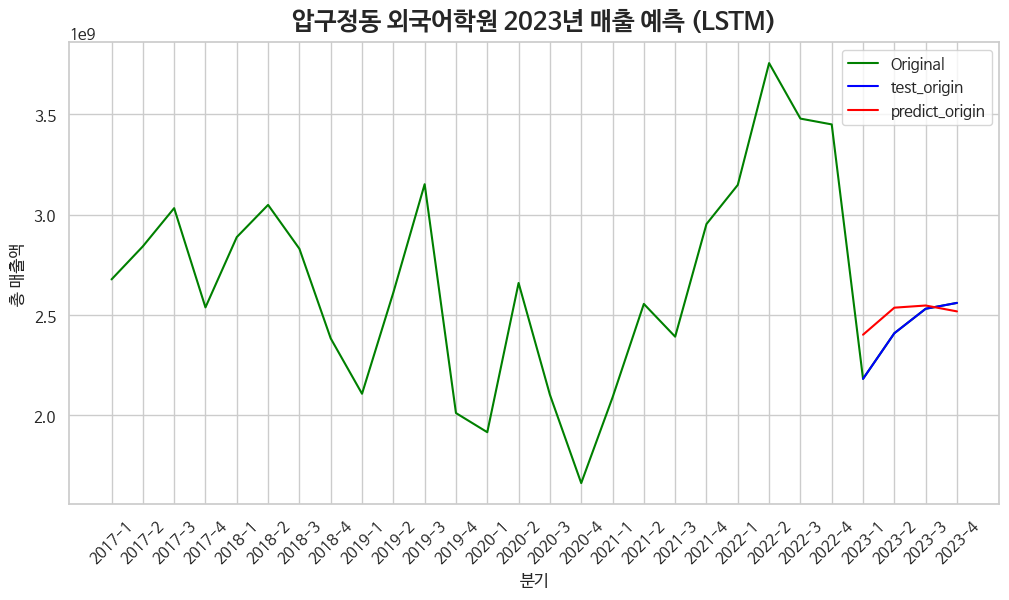

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 외국어학원 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_eng['분기'], ap_eng['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()